# Life Expectancy and GDP

## Project Overview

For this project, I will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

#### **Project Goals:**

* **Conduct an exploratory data analysis:**
    * Establish the question we are trying to solve
    * What kind of data do we have? What types of visualizations suit our types?
    * What's missing from the data? (if anything)
    * Where are the outliers?
    * How can we add, change or remove features to get more out of the data?

* **Questions to gain insight**
    * Has life expectancy increased over time in the six nations?
    * Has GDP increased over time in the six nations?
    * What is the average life expectancy in these nations?
    * Is there a correlation between GDP and life expectancy of a country?


In [2]:
# import packages

# Manipulation
import numpy as np
import pandas as pd

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
import missingno


### Exploratory Data Analysis

Steps:
   1. Import the Data
   2. Get a feel for the data, describe the data, look at the first/last rows, shape
   3. Take a deeper look into the data by querying/indexing the data
   4. Identify features of interest
   5. Recognize the challeges posed by the data such as missing values or outliers
   6. Discover patterns in the data (through visualization)

In [3]:
# 1 Import the data

all_data = pd.read_csv(r"all_data.csv")

# renaming column 'Life expectancy at birth (years)' to 'LE' for ease of querying
all_data = all_data.rename(columns={'Life expectancy at birth (years)': 'LE'})
all_data.head()

,Country,Year,LE,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
# 2 Get a feel for the data, describe the data, look at the first/last rows, shape

# GDP stats
all_data['GDP'].describe()

count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64

In [5]:
# Life Expectancy stats
all_data['LE'].describe()

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: LE, dtype: float64

In [6]:
all_data.keys()

Index(['Country', 'Year', 'LE', 'GDP'], dtype='object')

In [7]:
all_data.shape

(96, 4)

In [8]:
all_data.head()

,Country,Year,LE,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [9]:
all_data.tail()

,Country,Year,LE,GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


In [10]:
all_data.dtypes

Country     object
Year         int64
LE         float64
GDP        float64
dtype: object

#### Data Types
The dtypes function allows us to determine the following:
* Country is a nominal categorical variable
* LE and GDP are continuous numerical variables
* Year is a discrete numerical variable

In [12]:
# 3 Take a deeper look into the data by querying/indexing the data

In [13]:
# What is the average life expectancy in these nations?
all_data.groupby('Country').LE.mean().reset_index()

,Country,LE
0,Chile,78.94375
1,China,74.26250
2,Germany,79.65625
3,Mexico,75.71875
4,United States of America,78.06250
5,Zimbabwe,50.09375


In [14]:
# querying median Life expectancy per country for all years

all_data.groupby('Country').LE.median().reset_index()

,Country,LE
0,Chile,79.00
1,China,74.45
2,Germany,79.85
3,Mexico,75.65
4,United States of America,78.15
5,Zimbabwe,47.40


In [15]:
# querying mean GDP per country for all years

all_data.groupby('Country').GDP.mean().reset_index()

,Country,GDP
0,Chile,1.697888e+11
1,China,4.957714e+12
2,Germany,3.094776e+12
3,Mexico,9.766506e+11
4,United States of America,1.407500e+13
5,Zimbabwe,9.062580e+09


In [16]:
# 4 Identify features of interest

# In this analysis, the features of interest are a countries GDP and if it has an affect on life expectancy
# We know that the entire dataset has a LE median of 76.65 and a mean GDP of 3880498570768.396

<AxesSubplot:>

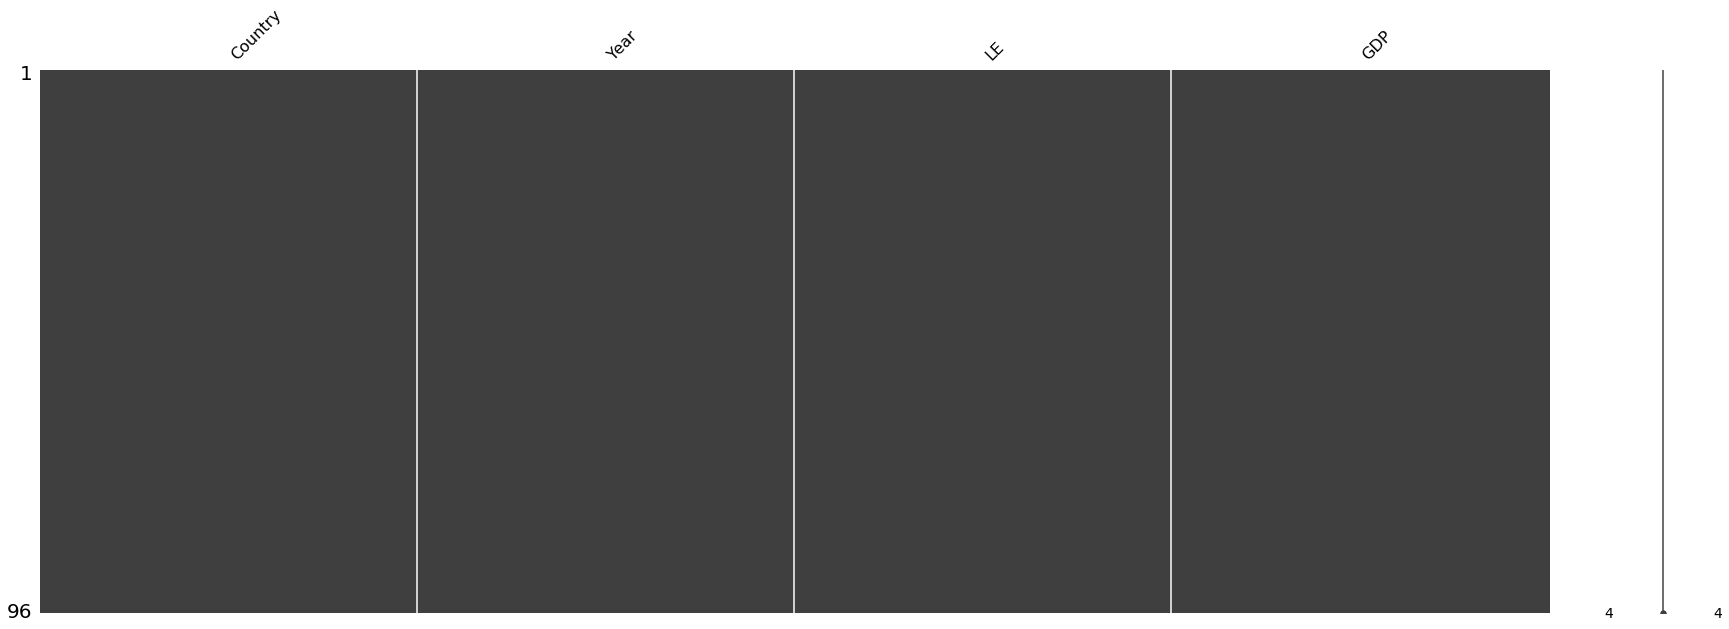

In [17]:
# 5 Recognize the challeges posed by the data such as missing values or outliers


# Plot graphic of missing values
missingno.matrix(all_data, figsize = (30,10))

In [18]:
# Alternative check from missing values using isnull()
all_data.isnull().sum()

Country    0
Year       0
LE         0
GDP        0
dtype: int64

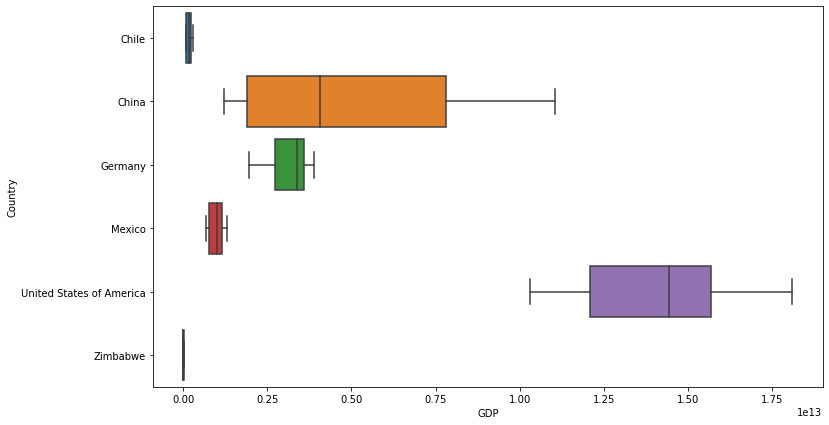

In [19]:
# GDP boxplot to visualize outliers
plt.figure(figsize=(12,7))
sns.boxplot(data=all_data, x='GDP', y='Country')
plt.show()

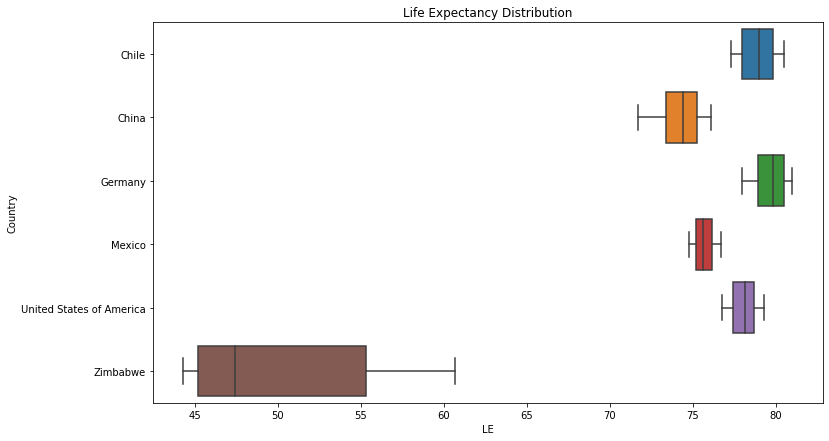

In [20]:
# LE boxplot to visualize outliers
plt.figure(figsize=(12,7))
sns.boxplot(data=all_data, x='LE', y='Country')
plt.title('Life Expectancy Distribution')
plt.show()

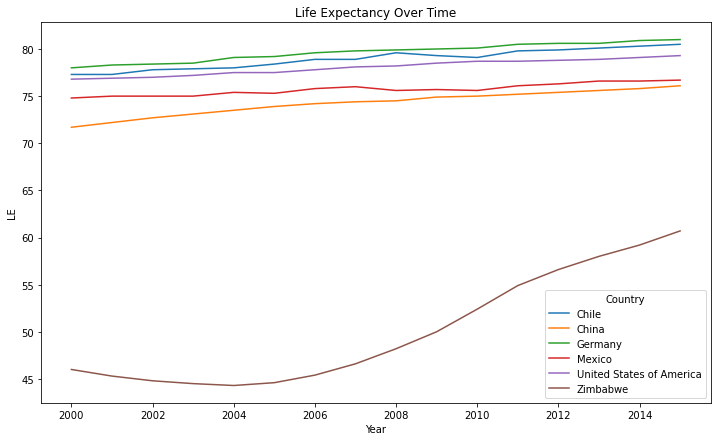

In [92]:
# line plot of life expectancy over time
plt.figure(figsize=(12,7))
sns.lineplot(data=all_data, x='Year', y='LE', hue='Country')
plt.title('Life Expectancy Over Time')
plt.savefig("Life_Expectancy_All_Over_Time.png")
plt.show()

Zimbabwe's life expectancy has increased dramatically since 2005.
For the reamining 5 nations, life expectancy has gradually increased.

In [58]:
# defining a percent increase of life expectancy function 


def le_increase_rate(country):
    prop = (country['LE'].values[15] / country['LE'].values[0]) - 1
    return prop

Zimbabwe = le_increase_rate(all_data[all_data.Country == 'Zimbabwe'])
print('Between 2000 and 2015 Zimbabwe\'s life expectancy rate increased by: ' + '{:.2%}'.format(Zimbabwe))


Between 2000 and 2015 Zimbabwe's life expectancy rate increased by: 31.96%


In [78]:
# finding average life expectancy rate increase for remaining 5 countries
US = le_increase_rate(all_data[all_data.Country == 'United States of America'])
Mexico = le_increase_rate(all_data[all_data.Country == 'Mexico'])
Germany = le_increase_rate(all_data[all_data.Country == 'Germany'])
China = le_increase_rate(all_data[all_data.Country == 'China'])
Chile = le_increase_rate(all_data[all_data.Country == 'China'])

names= [US, Mexico, Germany, China, Chile]
all_avg = sum(names)/len(names)

print('Between 2000 and 2015, life expectancies in The United States of America, Mexico, Germany, China, and Chile increased at a combined average rate of: ' + '{:.2%}'.format(all_avg))
# Total_Average = 

Between 2000 and 2015, life expectancies in The United States of America, Mexico, Germany, China, and Chile increased at a combined average rate of: 4.38%


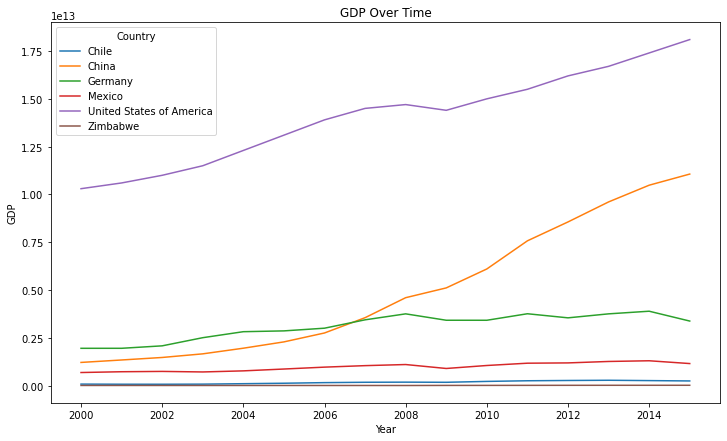

In [93]:
# line plot of GDP over time
plt.figure(figsize=(12,7))
sns.lineplot(data=all_data, x='Year', y='GDP', hue='Country')
plt.title('GDP Over Time')
plt.savefig("GDP_All_Over_Time.png")
plt.show()

The United States of America and China have dramatically increased their respective GDPs over this time period. 

In [91]:
# defining GDP rate increase function 
def GDP_increase_rate(country):
    prop = (country['GDP'].values[15] / country['GDP'].values[0]) - 1
    return prop

US = GDP_increase_rate(all_data[all_data.Country == 'United States of America'])
print('The United States of America\'s GDP was ' + '{:.2%}'.format(US) + ' larger in 2015, relative to what it was in 2000.')

China = GDP_increase_rate(all_data[all_data.Country == 'China'])
print('China\'s GDP was '+ '{:.2%}'.format(China) + ' larger in 2015, relative to what it was in 2000.')

Zimbabwe = GDP_increase_rate(all_data[all_data.Country == 'Zimbabwe'])
print('Zimbabwe\'s GDP was '+ '{:.2%}'.format(Zimbabwe) + ' larger in 2015, relative to what it was in 2000.')

The United States of America's GDP was 75.73% larger in 2015, relative to what it was in 2000.
China's GDP was 813.42% larger in 2015, relative to what it was in 2000.
Zimbabwe's GDP was 143.72% larger in 2015, relative to what it was in 2000.


In [23]:
# Is there a correlation between GDP and life expectancy of a country?
np.corrcoef(all_data['GDP'], all_data['LE'])

array([[1.        , 0.34320675],
       [0.34320675, 1.        ]])

There is a linear assocation of .343 between GDP and Life Expectancy.

Generally, a correlation larger than about .3 indicates a linear association. A correlation greater than about .6 suggestions a strong linear association.